In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from numpy.random import random, normal
import pandas as pd
from scipy.io import wavfile as wv
from scipy import stats

blue, green, red, purple = sns.color_palette('deep', n_colors=4)

# Data analysis & visualization

An important part of data analysis is data visualization. We've already been using `matplotlib` to do this some, and this week we'll dig deeper into this package to understand a bit more about what it can do and how we can use it to make figures look exactly how we want them to look. The [matplotlib documentation](http://matplotlib.org/contents.html) provides a huge amount of information, and [this blog post](http://pbpython.com/effective-matplotlib.html) discusses a useful way to go about using matplotlib (a fair amount of which we'll discuss here).

As we've seen before, there are two basic objects we will often deal with when generating a figure, the `Figure` object and `Axes` objects.

We'll start by making a moderately complicated signal to plot:

In [2]:
np.random.seed(seed=45232)
fs = 1000
t = np.arange(start=0, stop=1, step=1/fs)
y1 = .5*np.cos(2*np.pi*15*t + random()*2*np.pi)
y2 = 1.3*np.cos(2*np.pi*7*t + random()*2*np.pi)
y3 = 2*np.cos(2*np.pi*2*t + random()*2*np.pi)
s = y1 + y2 + y3 #+ n

We can create a figure and axis object with the `subplots()` method in `pyplot` (here `plt`). Then, we can plot our signal (defined above) using the `plot()` axis method, and we can adjust the limits on the axes by using the `set_ylim()` and `set_xlim()` axis methods.

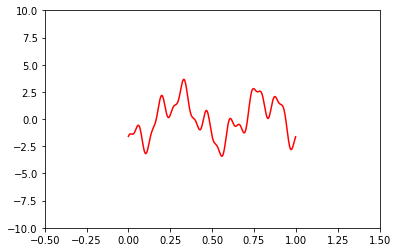

In [3]:
fig, ax = plt.subplots()
ax.plot(t,s,'r')
ax.set_ylim(-10,10)
ax.set_xlim(-.5,1.5);

We can change the size of the figure when we create the figure object. We can also specify where the tick marks are on each axis and what the labels for the tick marks are, using the `set_xticks()`, `set_xticklabels()`, `set_yticks()`, and `set_yticklabels()` methods.

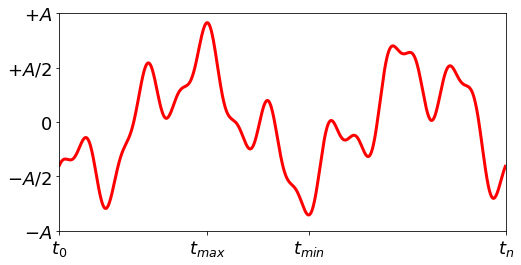

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(t,s,'r',lw=3)
ax.set_ylim(-4,4)
ax.set_xlim(0,1)
ax.set_xticks([0,t[np.argmax(s)],t[np.argmin(s)],1])
ax.set_xticklabels(['$t_0$','$t_{max}$','$t_{min}$','$t_n$'], fontsize=18)
ax.set_yticks(np.linspace(-4,4,5))
ax.set_yticklabels(['$-A$','$-A/2$','$0$','$+A/2$','$+A$'], fontsize=18);

We can easily write our own functions to make changes to figures if we don't like the default way that matplotlib does it. For example, here's a function for automatically adjusting axis limits based on the range of the data on each dimension and a specified 'padding' proportion on each dimension:

In [5]:
def adjust_limits(axis, xpad=.1, ypad=.1, adj_x=True, adj_y=True):
    if adj_x:
        xx = (axis.dataLim.x0,axis.dataLim.x1)
        x_range = xx[1]-xx[0]
        xlims = (xx[0]-xpad*x_range,xx[1]+xpad*x_range)
        axis.set_xlim(xlims)
    else:
        xlims = None
    if adj_y:
        yy = (axis.dataLim.y0,axis.dataLim.y1)
        y_range = yy[1]-yy[0]
        ylims = (yy[0]-ypad*y_range,yy[1]+ypad*y_range)
        axis.set_ylim(ylims)
    else:
        ylims = None
    return xlims, ylims

Matplotlib allows you to annotate figures pretty easily:

[ 0.331       3.65698523]
[ 0.558      -3.41729601]


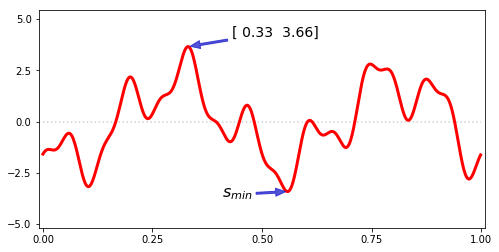

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(t,np.zeros(len(t)),':',color=[.25]*4)
ax.plot(t,s,'r',lw=3)
xlims, ylims = adjust_limits(ax, xpad=0.01, ypad=.25)
ax.set_xticks(np.arange(0,1,.25))
ax.set_yticks(np.linspace(np.ceil(ylims[0]),np.floor(ylims[1]),5))
ax.set_xticks(np.linspace(0,1,5))
arrow_props = {'shrink':.05, 'width':2, 'headlength':10, 'headwidth':8, 'color':[.1,.1,.8,.75]}
max_xy = np.array([t[np.argmax(s)],np.max(s)])
#ax.annotate(s='$s_{max}$',xy=max_xy, xytext=max_xy+[.1,.5], fontsize=16, arrowprops=arrow_props)
ax.annotate(s=str(max_xy.round(2)),xy=max_xy, xytext=max_xy+[.1,.5], fontsize=14, arrowprops=arrow_props)
min_xy = np.array([t[np.argmin(s)],np.min(s)])
ax.annotate(s='$s_{min}$',xy=min_xy, xytext=min_xy+[-.15,-.25], fontsize=16, arrowprops=arrow_props);
print(max_xy)
print(min_xy)

If we have multivariate data, we can easily make a matrix of scatter plots to visualize the relationships between each pair of variables (and the distribution of each variable on its own). Here, we'll generate some random data with different magnitudes of statistical relationships between each pair:

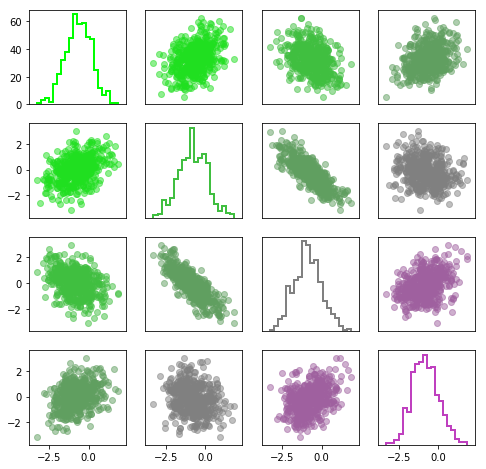

In [7]:
np.random.seed(seed=3773)
n_obs = 500
var_1 = np.random.normal(loc=0,scale=1,size=n_obs)
var_2 = .75*var_1 + np.random.normal(loc=3,scale=2,size=n_obs)
var_3 = -.35*var_2 + np.random.normal(loc=-.5,scale=.5,size=n_obs)
var_4 = .5*var_3 + .5*var_1 + np.random.normal(loc=0,scale=.65,size=n_obs)
rvars = np.stack([var_1,var_2,var_3,var_4],axis=1)

nv = 4
fig, axes = plt.subplots(nrows=nv, ncols=nv, figsize=(8,8))
for i in range(nv):
    for j in range(nv):
        clr = [(i+j)/(2*nv),1-(i+j)/(2*nv),(i+j)/(2*nv),.5]
        axt = axes[i,j]
        if i==j:
            axt.hist(rvars[:,i],bins=20,histtype='step', color=clr[:3], lw=2)
            adjust_limits(axt, adj_y=False)
        else:
            axt.plot(rvars[:,i],rvars[:,j],'o',color=clr)
            adjust_limits(axt)
        if j != 0:
            axt.set_yticks([])
        if i != nv-1:
            axt.set_xticks([])

Matplotlib has a large number of built-in specialty plots. For example, you can make box plots and violin plots using the `boxplot()` and `violinplot()` functions:

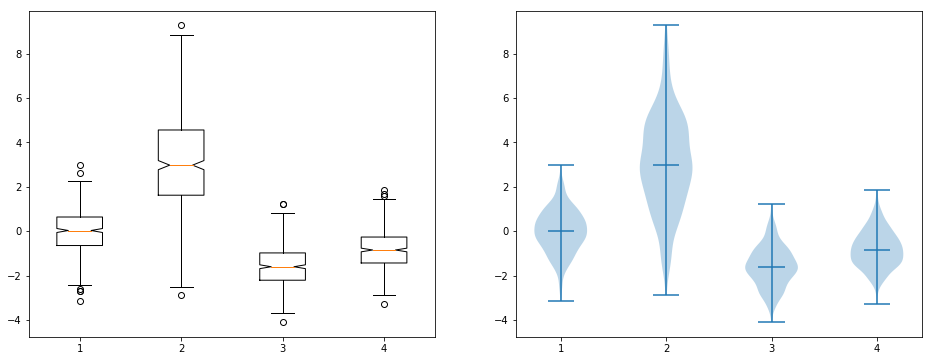

In [8]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
ax1, ax2 = axes
ax1.boxplot(rvars, notch=True, sym='o');
ax2.violinplot(rvars, showmedians=True); ax2.set_xticks(np.arange(1,5));

If we want multiple subplots in a single figure, we are not limited to matrices of regularly-sized subplots:

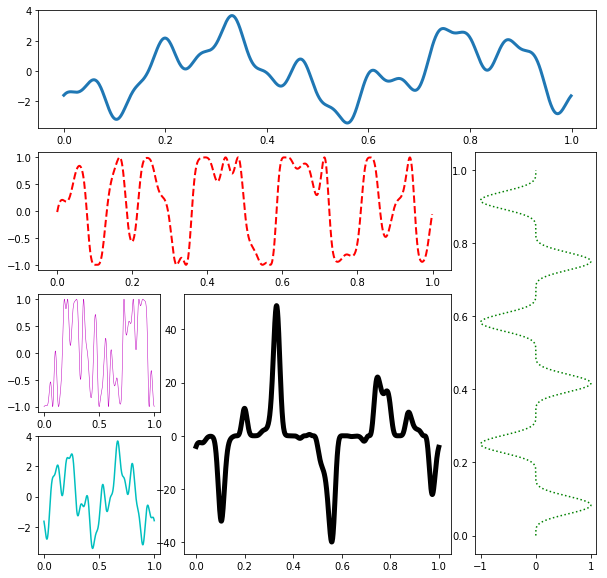

In [9]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
ax2 = plt.subplot2grid((4,4), (1,0), colspan=3)
ax3 = plt.subplot2grid((4,4), (1,3), rowspan=3)
ax4 = plt.subplot2grid((4,4), (2,0))
ax5 = plt.subplot2grid((4,4), (3,0))
ax6 = plt.subplot2grid((4,4), (2,1), colspan=2, rowspan=2)

ax1.plot(t,s, lw=3)
ax2.plot(t,np.cos(s),'r--', lw=2)
ax3.plot(np.sin(2*np.pi*3*t)**5,t,'g:')
ax4.plot(t,np.sin(s),'m', lw=.5)
ax5.plot(t,s[::-1],'c')
ax6.plot(t,s**3,'k', lw=5);

As we've seen before, matplotlib makes it easy to plot a spectrogram and change the `colormap`. Here we'll read in a sound file, create a bandpass filter, and illustrate the filter:

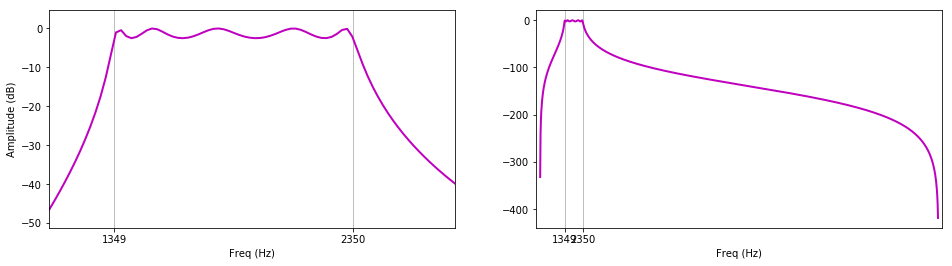

In [10]:
from scipy.signal import iirfilter, lfilter, freqz

fs,xx = wv.read('../w08/sentences/f0s2.wav')

nyq = fs/2
cut_freqs = np.array([1350,2350]) # Hz
cf_rad = np.array(cut_freqs/nyq)

Nord = 5
npts = 1024

b, a = iirfilter(N=Nord, Wn=cf_rad, btype='bandpass', ftype='cheby1', rp=2.5, rs=15)
w, fz = freqz(b, a, worN=npts)

fig, axes = plt.subplots(1,2,figsize=(16,4))
ax1, ax2 = axes
xl, xh = np.int(np.floor(.8*cf_rad[0]*npts)), np.int(np.floor(1.2*cf_rad[1]*npts))
ax1.plot(w[xl:xh], 20*np.log10(np.abs(fz[xl:xh])), 'm-', lw=2)
xticks = cf_rad*np.pi; adjust_limits(ax1, xpad=0)
ax1.set_xticks(xticks); ax1.set_xticklabels([np.int(nyq*i/np.pi) for i in xticks])
ax1.grid(axis='x'); ax1.set_ylabel('Amplitude (dB)'); ax1.set_xlabel('Freq (Hz)')
ax2.plot(w, 20*np.log10(np.abs(fz)), 'm-', lw=2)
ax2.set_xticks(xticks); ax2.set_xticklabels([np.int(nyq*i/np.pi) for i in xticks])
ax2.grid(axis='x'); ax2.set_xlabel('Freq (Hz)'); adjust_limits(ax2, xpad=.01, ypad=.05);

Next, we'll filter the sound and plot spectrograms of the unfiltered and filtered sounds:

1024 32


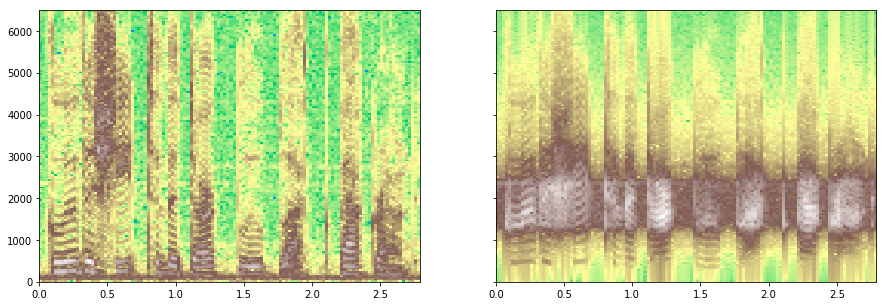

In [11]:
x_bp = lfilter(b, a, xx)

x_arr = np.stack([xx,x_bp],axis=1)

fig, axes = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

nfft = 2**10
nolp = 2**5
print(nfft,nolp)

#color_maps = pl.colormaps()
#print(color_maps)
plt.set_cmap('terrain')
for i,xt in enumerate(x_arr.T):
    this_ax = axes[i]
    spt = this_ax.specgram(x=xt,NFFT=nfft,Fs=fs,noverlap=nolp, scale='dB')
    this_ax.set_ylim(0,6500)

With some help from numpy, we can easily make contour/mesh/etc plots, too. First, we'll use the numpy function `meshgrid()` to make 2D arrays of `x` and `y` coordinates, then we'll create a 2D array of a complicated function of `x` and `y`:

In [12]:
L = 3
d = .15
x = np.arange(-L, L+d/2, d)
y = np.arange(-L, L+d/2, d)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)**2 - .8*np.cos(Y+np.pi/7)**2 + .3*np.sin(X+np.pi/3)**2

print(X)
print('')
print(Y)

[[-3.   -2.85 -2.7  ...,  2.7   2.85  3.  ]
 [-3.   -2.85 -2.7  ...,  2.7   2.85  3.  ]
 [-3.   -2.85 -2.7  ...,  2.7   2.85  3.  ]
 ..., 
 [-3.   -2.85 -2.7  ...,  2.7   2.85  3.  ]
 [-3.   -2.85 -2.7  ...,  2.7   2.85  3.  ]
 [-3.   -2.85 -2.7  ...,  2.7   2.85  3.  ]]

[[-3.   -3.   -3.   ..., -3.   -3.   -3.  ]
 [-2.85 -2.85 -2.85 ..., -2.85 -2.85 -2.85]
 [-2.7  -2.7  -2.7  ..., -2.7  -2.7  -2.7 ]
 ..., 
 [ 2.7   2.7   2.7  ...,  2.7   2.7   2.7 ]
 [ 2.85  2.85  2.85 ...,  2.85  2.85  2.85]
 [ 3.    3.    3.   ...,  3.    3.    3.  ]]


Here's a contour plot of the complicated function:

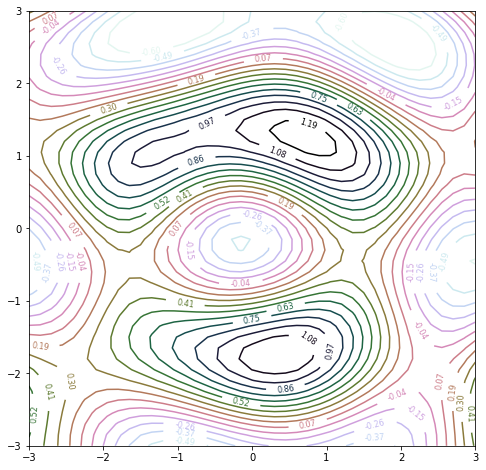

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
v = np.linspace(Z.min()-.05,Z.max()+.05,20)
plt.set_cmap('cubehelix_r')
CS = ax.contour(X,Y,Z,v)
ax.clabel(CS, inline=True, fontsize=8, inline_spacing=10, fmt='%1.2f');

We can plot the same function in a 3D figure with some additional matplotlib sub-modules:

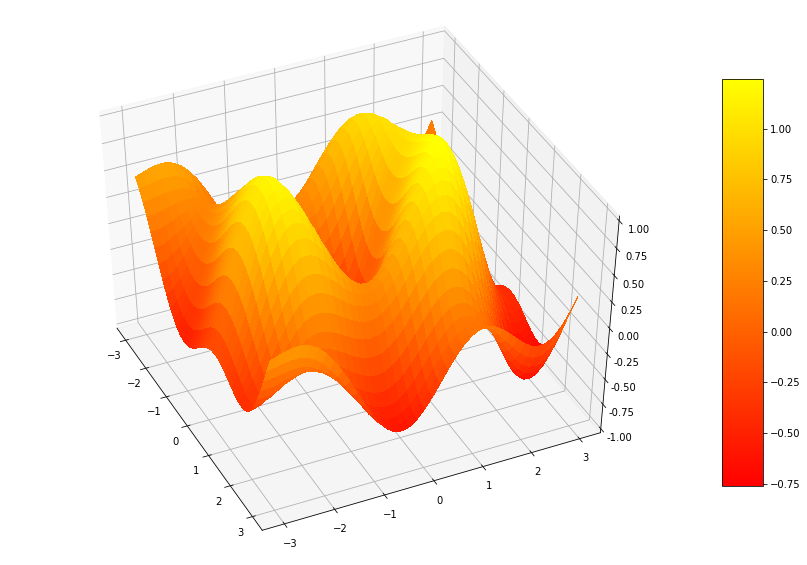

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.autumn, linewidth=0, antialiased=False)

ax.set_zlim(-1.0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(9))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(elev=45, azim=-25)

fig.colorbar(surf, shrink=0.75, aspect=10);

Of course, we can (and should) plot actual data. For example, we can read in the raw data from [McMurray & Jongman (2011) What Information Is Necessary for Speech Categorization? Harnessing Variability in the Speech Signal by Integrating Cues Computed Relative to Expectations. *Psychological Review*, 118(2), 219-246.](http://psycnet.apa.org/fulltext/2011-05323-001.html)

In [49]:
df_full = pd.read_csv('mnj_raw.csv', index_col=0)
cols = ['Talker','Vowel','Fricative','F0','F1','F2','F3','rms_f','rms_v','dur_f','dur_v','M1','M2']
df = df_full[cols].dropna() # .copy() method avoids annoying warning that is irrelevant here
voiced = ['dh','v','z','zh']
voice_lab = ['voiceless','voiced']
is_voiced = np.in1d(df['Fricative'],voiced)
df['Voicing'] = [voice_lab[i] for i in is_voiced]
alveolar = ['s','z','sh','zh']
place_lab = ['labial','alveolar']
is_alveolar = np.in1d(df['Fricative'],alveolar)
df['Place'] = [place_lab[i] for i in is_alveolar]
print(df.shape)
df.head()

(2870, 15)


Talker Vowel Fricative          F0          F1           F2           F3  \
idx                                                                            
1       M6     i         f  139.102921  249.279065  2423.091093  3116.721530   
2       M6     i         f  128.094738  254.783863  2420.783160  3087.480489   
3       M6     i         f  137.880145  247.334454  2392.396320  3081.297560   
4       M6     i         v  108.600183  255.654204  2324.495743  2865.006911   
5       M6     i         v  109.131839  245.071682  2340.471058  2852.945244   

     rms_f  rms_v  dur_f  dur_v        M1           M2    Voicing   Place  
idx                                                                        
1    55.26  75.71  150.0   78.0  6600.555  2018.173357  voiceless  labial  
2    54.84  75.54  155.0   76.0  6041.460  2282.384751  voiceless  labial  
3    54.79  75.29  158.0   75.0  6602.445  2237.137043  voiceless  labial  
4    64.49  74.24   70.0   94.0  7074.535  2966.282581     voiced  labial  
5    66.70  73.10   83.0   83.0  6429.605  3152.498160     voiced  labial

We can make a matrix of scatter plots to illustrate this large-ish data set:

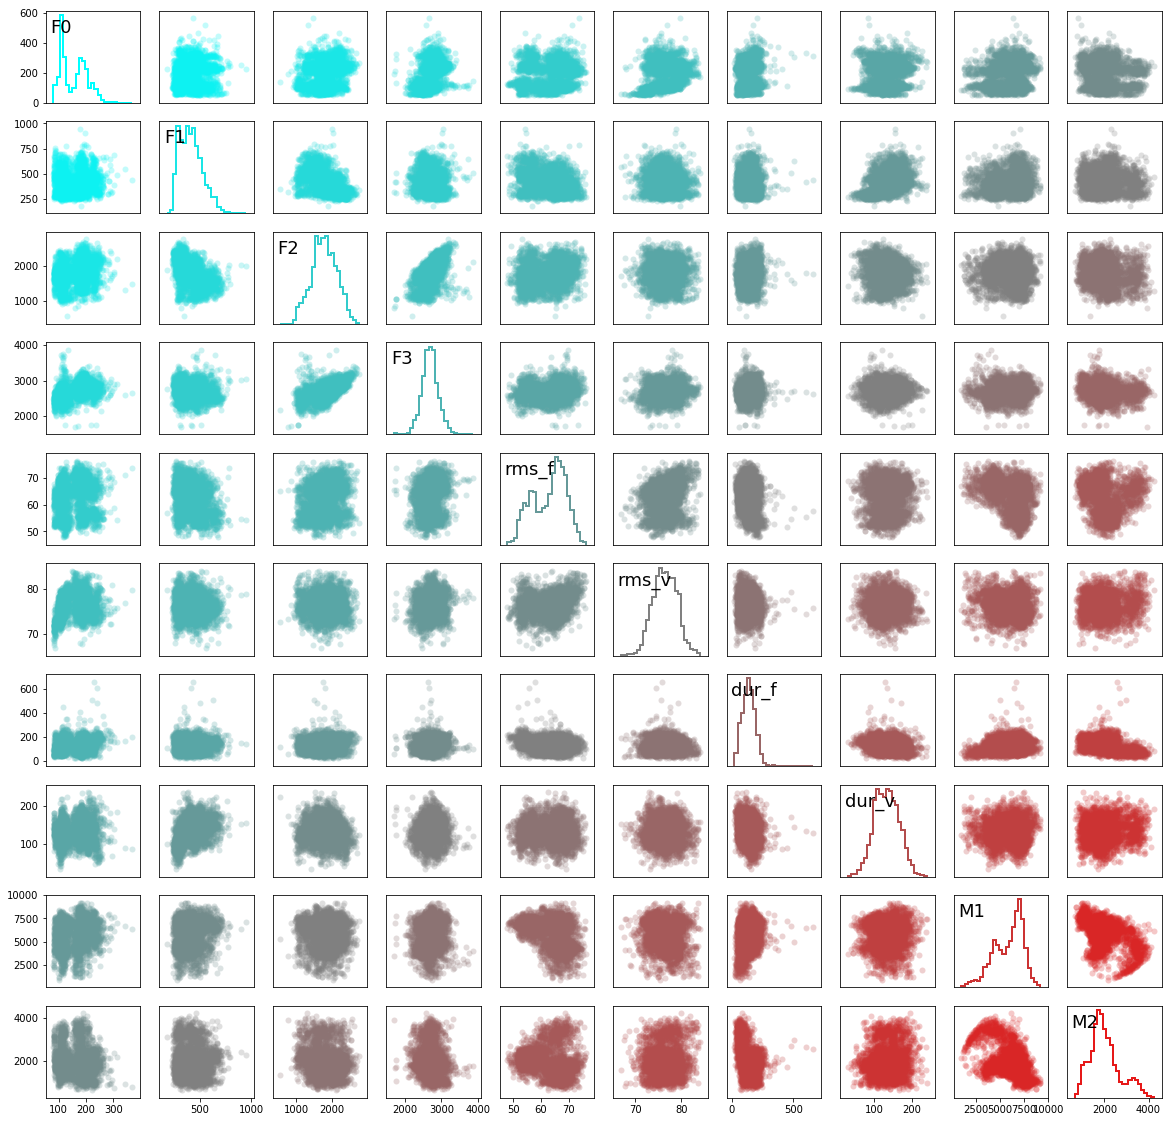

In [16]:
var_names = cols[3:]
avars = df[var_names].as_matrix()
nv = len(var_names)

fig, axes = plt.subplots(nrows=nv, ncols=nv, figsize=(20,20))
for i in range(nv):
    for j in range(nv):
        clr = [(i+j)/(2*nv),1-(i+j)/(2*nv),1-(i+j)/(2*nv),.25]
        axt = axes[i,j]
        if i==j:
            hh = axt.hist(avars[:,i],bins=25,histtype='step', color=clr[:3], lw=2)
            xl,yl = adjust_limits(axt, adj_y=False)
            yrng = hh[0].max()
            xrng = xl[1]-xl[0]
            axt.text(xl[0]+.05*xrng,.8*yrng,var_names[i],fontsize=18)
        else:
            axt.plot(avars[:,j],avars[:,i],'.',ms=12,mew=0,color=clr)
            adjust_limits(axt)
        if j != 0:
            axt.set_yticks([])
        if i != nv-1:
            axt.set_xticks([])

As we discussed last week, we can also use pandas' `groupby()` function (with various aggregation functions) to make custom plots to illustrate statistical patterns of interest. For example, when voicing begins in a vowel after a voiced consonant, the voicing tends to be fairly consistent from one to the other. By way of contrast, when voicing begins in a vowel following a voiceless consonant, the transition from voicelessness to voicing corresponds to a transition from holding the vocal folds rigid (and open) to holding the vocal folds close together so that they can oscillate. The rigidity during the voiceless consonant tends to produce higher rates of oscillation when voicing begins.

We can make figure illustrating average F0 values for (the vowel immediately after) voiced and voiceless fricatives for each speaker in the data set:

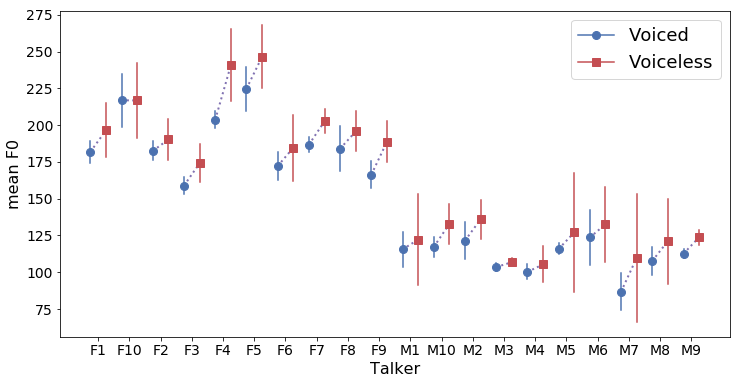

In [17]:
mu_tlk_voi = df.groupby(['Talker','Voicing']).mean()
sd_tlk_voi = df.groupby(['Talker','Voicing']).std()
fig, ax = plt.subplots(1,1,figsize=(12,6))
vd_by_tlk = mu_tlk_voi.xs('voiced',level='Voicing')['F0']
vl_by_tlk = mu_tlk_voi.xs('voiceless',level='Voicing')['F0']
vd_by_tlk_sd = sd_tlk_voi.xs('voiced',level='Voicing')['F0']
vl_by_tlk_sd = sd_tlk_voi.xs('voiceless',level='Voicing')['F0']
for i,vv in enumerate(zip(vd_by_tlk,vl_by_tlk,vd_by_tlk_sd,vl_by_tlk_sd)):
    dd,ll,dd_sd,ll_sd = vv
    vdl, = ax.plot([2*i,2*i],[dd-dd_sd,dd+dd_sd],'-', color=blue)
    vll, = ax.plot([2*i+1,2*i+1],[ll-ll_sd,ll+ll_sd],'-', color=red)
    ax.plot([2*i,2*i+1],[dd,ll],':',color=purple,lw=2)
vds, = ax.plot(np.arange(0,40,2),vd_by_tlk,'o',color=blue,ms=8)
vls, = ax.plot(np.arange(1,41,2),vl_by_tlk,'s',color=red,ms=8)
ax.tick_params(labelsize=14)
ax.set_xticks(np.arange(0.5,40.5,2))
ax.set_xticklabels(vd_by_tlk.index)
ax.set_ylabel('mean F0', fontsize=16); ax.set_xlabel('Talker', fontsize=16)
ax.legend([(vds,vdl),(vls,vll)],['Voiced','Voiceless'], fontsize=18);

If we don't want to fiddle with matplotlib, there are some other visualization packages available, too. There is a [ggplot clone](http://ggplot.yhathq.com/), a package called [altair](https://altair-viz.github.io/), and, as we've used repeatedly already, [seaborn](http://seaborn.pydata.org/).

Since we've already imported seaborn, our plots are doing some seaborn-specific things. We'll play around with some seaborn settings to see what the basic options are. First, we'll define a function to illustrate multiple sinusoids in a single plot:

In [18]:
def sinplot(flip=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12,6))
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

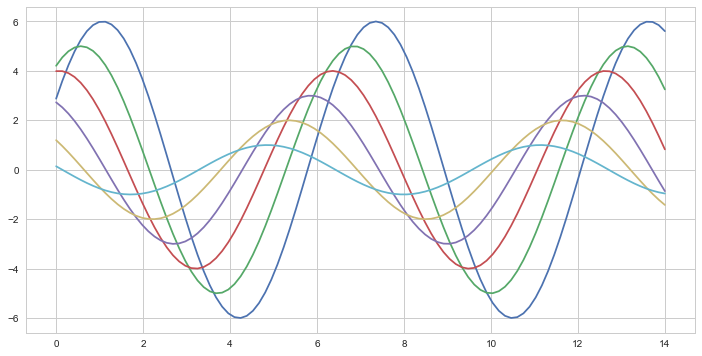

In [19]:
sns.set(style='whitegrid')
sinplot()

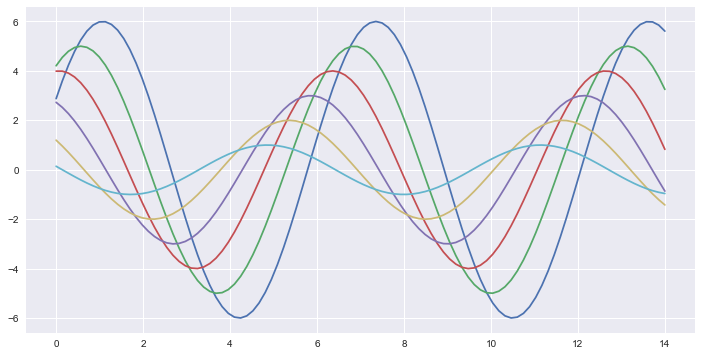

In [20]:
sns.set_style('darkgrid')
sinplot()

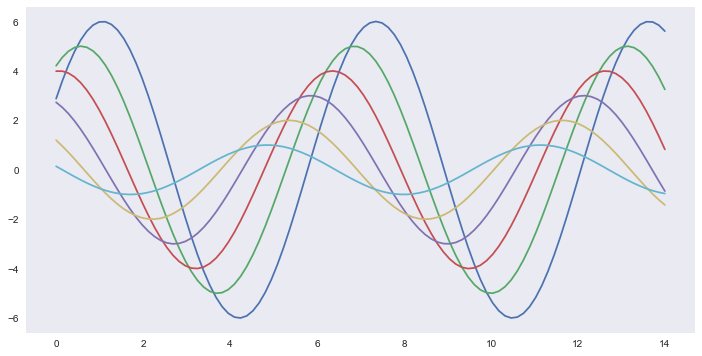

In [21]:
sns.set_style('dark')
sinplot()

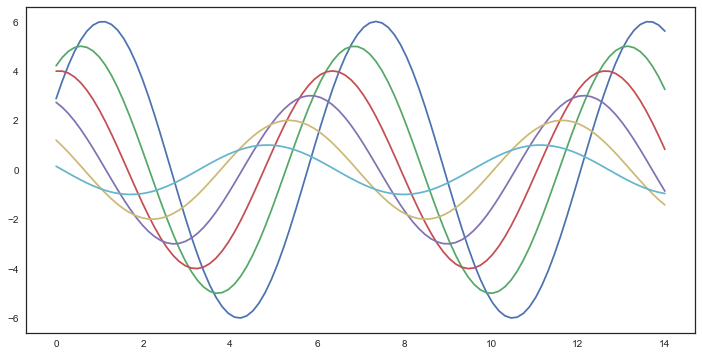

In [22]:
sns.set_style('white')
sinplot()

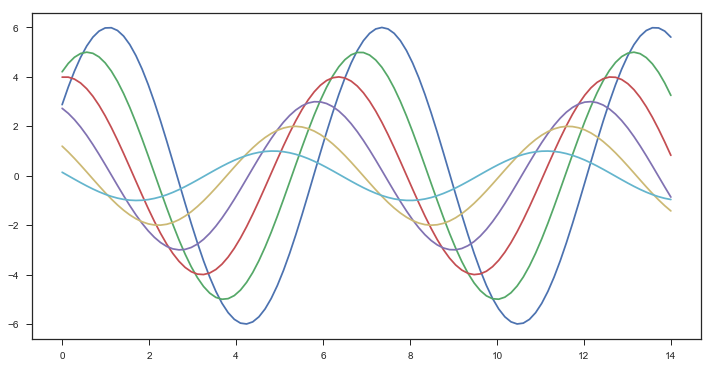

In [23]:
sns.set_style('ticks')
sinplot()

If you want to simplify the axes and ticks, seaborn has a nice function `despine()` (which we've seen before at least a couple times):

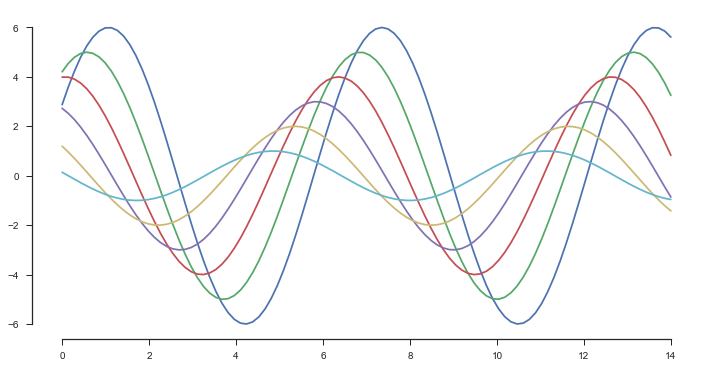

In [24]:
sinplot()
sns.despine(trim=True)

Seaborn works "on top of" matplotlib, so you can use both simultaneously:

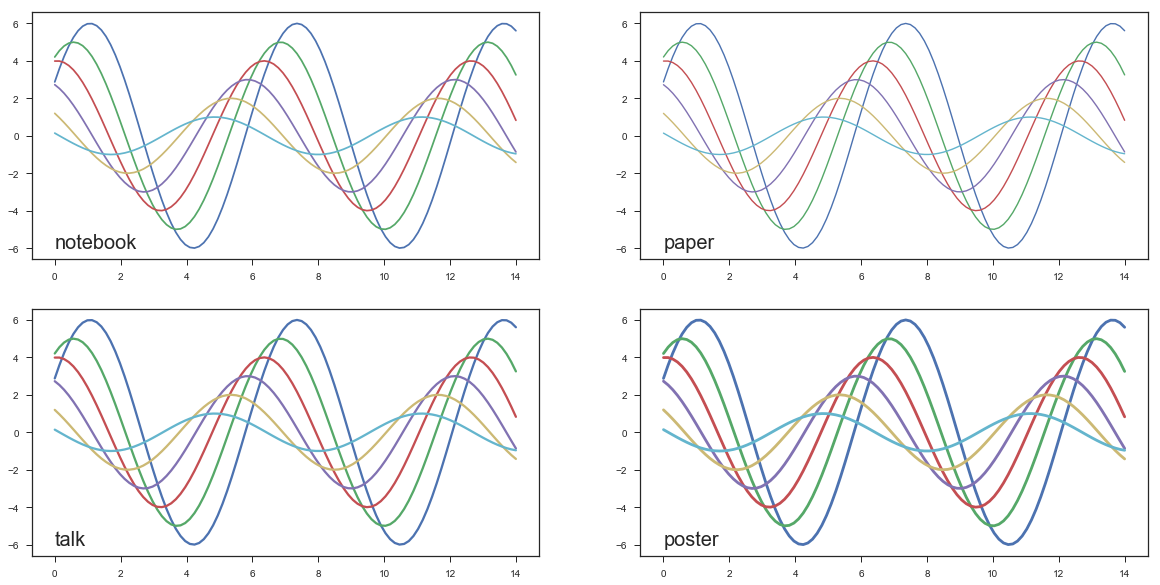

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
axes = axes.ravel()
ctxt = ['notebook','paper','talk','poster']
for ii in range(4):
    sns.set_context(ctxt[ii])
    sinplot(ax=axes[ii])
    axes[ii].text(0,-6,ctxt[ii], fontsize=20)

Seaborn makes it easy to fiddle with the color palette (and make fancy 2D figures):

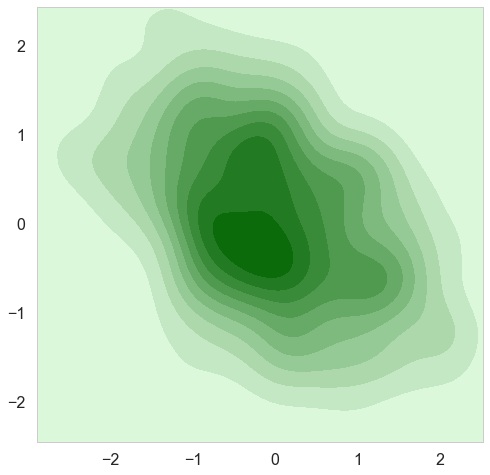

In [26]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=500).T
cmap = sns.light_palette('darkgreen', as_cmap=True)
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=ax, cut=0);

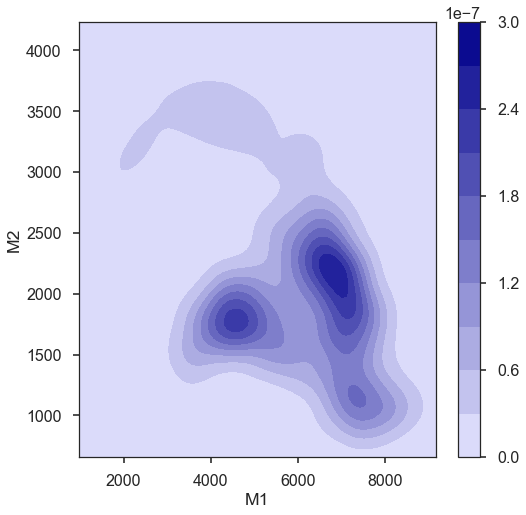

In [28]:
cmap = sns.light_palette('darkblue', as_cmap=True)
sns.set_style('ticks')
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.kdeplot(df['M1'], df['M2'], cmap=cmap, shade=True, ax=ax, cut=0, cbar=True, levels=np.linspace(0,3e-7,11));

You can visualize both 2D and 1D distributions simultaneously:

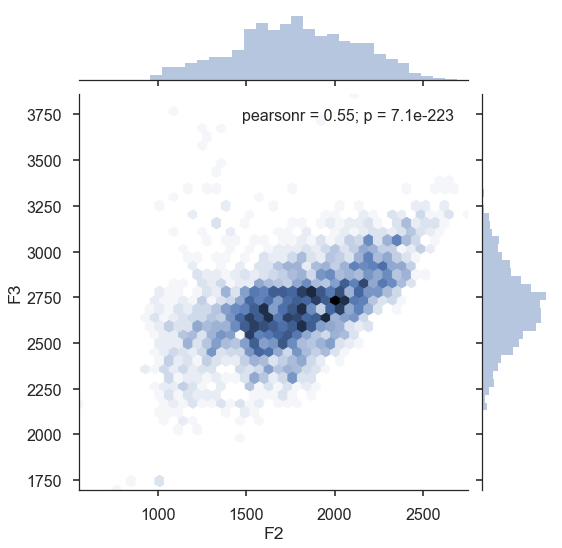

In [29]:
sns.set_style('ticks')
sns.jointplot(df['F2'],df['F3'], size=8, kind='hex'); # kind='kde'bb

Seaborn has some nice, simple methods for making grids of plots:

In [41]:
sns.pairplot?

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

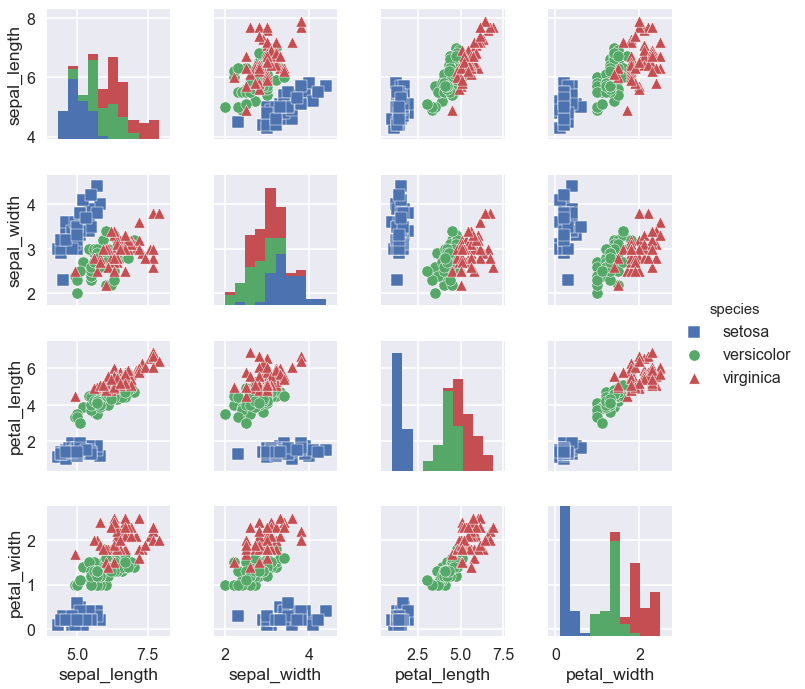

In [42]:
sns.set_style('darkgrid')
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', markers=['s','o','^']);
iris.head(n=3)

Seaborn also builds in some nice details with some basic statistical plots:

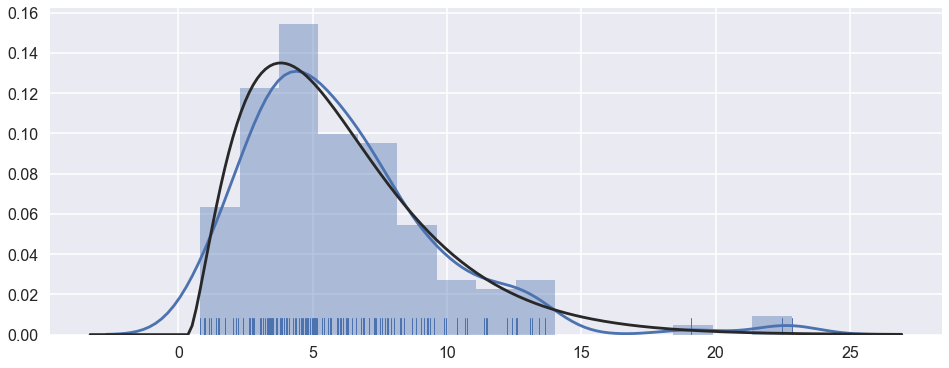

In [45]:
x = np.random.gamma(shape=3, scale=2, size=150)
fig, ax = plt.subplots(1, 1, figsize=(16,6))
sns.distplot(x, hist=True, kde=True, rug=True, fit=stats.gamma, ax=ax);

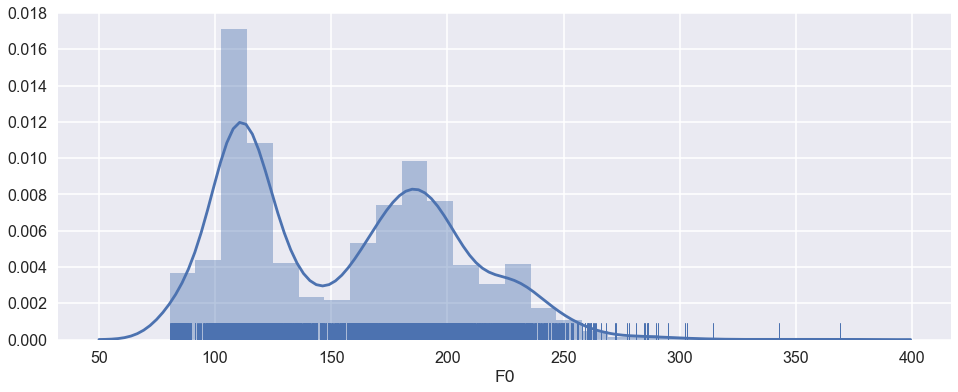

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
sns.distplot(df['F0'], hist=True, kde=True, rug=True, ax=ax);

Let's return to the McMurray & Jongman data to illustrate some (more) exploratory use of visualization with real data.

Recall that we specified two phonetic features that are likely to influence at least some of the acoustic measurements in the data set (and that we verified did influence at least one measurement).

We will use the `hue` argument in the `pairplot()` function to see if, and if so how, voicing and place influence a subset of the acoustic measures in the data set.

In [50]:
df.head()

Talker Vowel Fricative          F0          F1           F2           F3  \
idx                                                                            
1       M6     i         f  139.102921  249.279065  2423.091093  3116.721530   
2       M6     i         f  128.094738  254.783863  2420.783160  3087.480489   
3       M6     i         f  137.880145  247.334454  2392.396320  3081.297560   
4       M6     i         v  108.600183  255.654204  2324.495743  2865.006911   
5       M6     i         v  109.131839  245.071682  2340.471058  2852.945244   

     rms_f  rms_v  dur_f  dur_v        M1           M2    Voicing   Place  
idx                                                                        
1    55.26  75.71  150.0   78.0  6600.555  2018.173357  voiceless  labial  
2    54.84  75.54  155.0   76.0  6041.460  2282.384751  voiceless  labial  
3    54.79  75.29  158.0   75.0  6602.445  2237.137043  voiceless  labial  
4    64.49  74.24   70.0   94.0  7074.535  2966.282581     voiced  labial  
5    66.70  73.10   83.0   83.0  6429.605  3152.498160     voiced  labial

There are good theoretical reasons to expect voicing to influence F0 (as we saw above). Voicing and place are also likely to influence rms_f (the root mean square energy in the fricative) and dur_f (the duration of the fricative), and it should also influence F1, F2, M1 (spectral mean), M2 (spectral variance), and maybe F3. We'll look at just these variables, broken up into two plots, coding voicing and place by color:

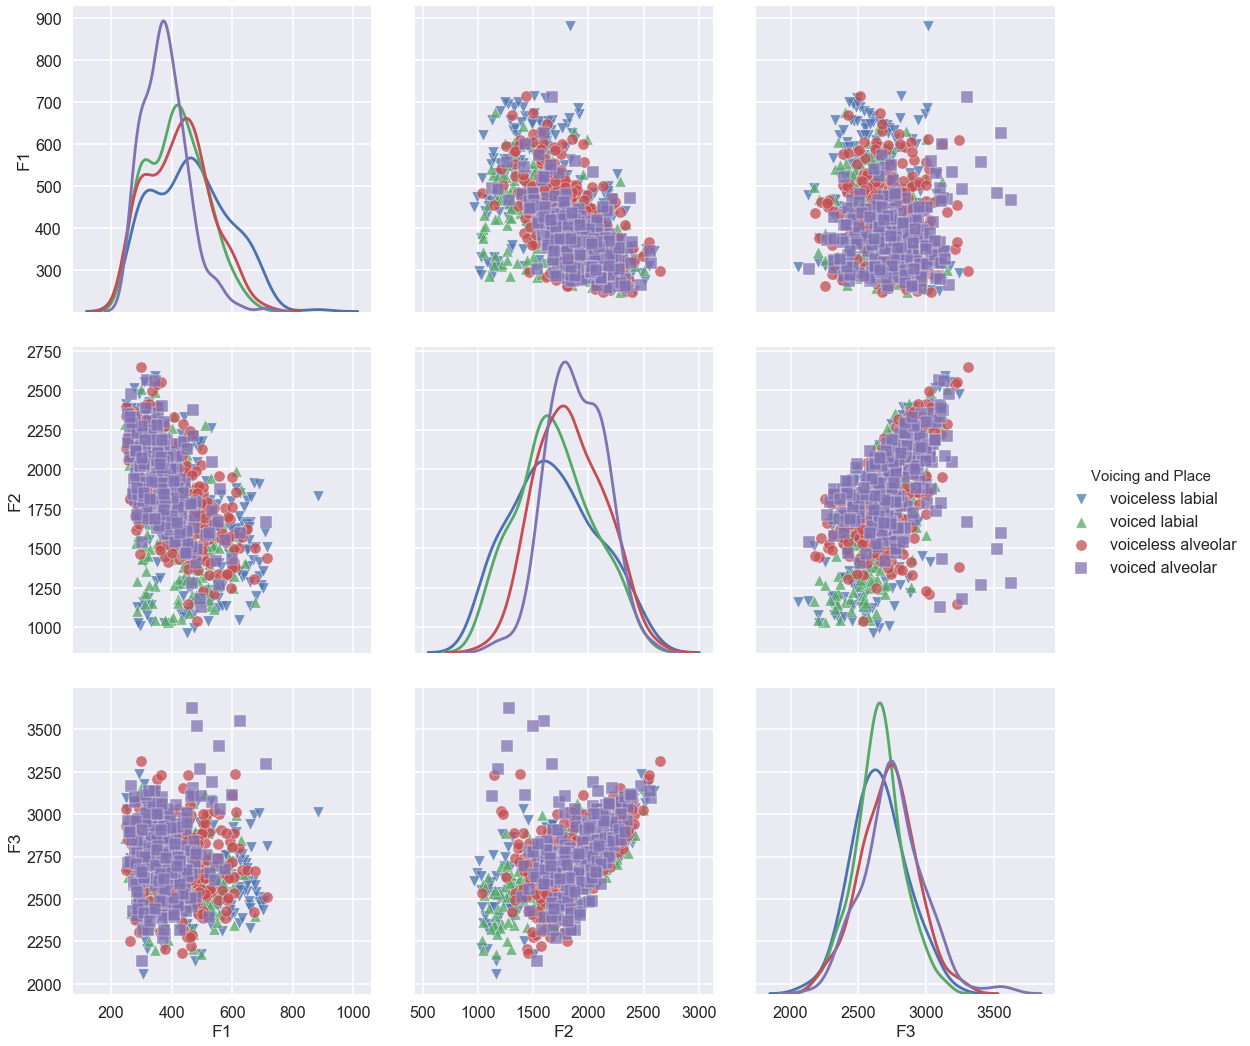

In [94]:
cols = ['F1','F2','F3','Voicing and Place']
mu_df = df.groupby(['Talker','Vowel','Fricative']).mean()
mu_df.reset_index(inplace=True)
is_voiced = np.in1d(mu_df['Fricative'],voiced)
mu_df['Voicing'] = [voice_lab[i] for i in is_voiced]
is_alveolar = np.in1d(mu_df['Fricative'],alveolar)
mu_df['Place'] = [place_lab[i] for i in is_alveolar]
mu_df['Voicing and Place'] = mu_df['Voicing'] + ' ' + mu_df['Place']
sns.pairplot(mu_df[cols], hue='Voicing and Place', markers=['v','^','o','s'],
             hue_order=['voiceless labial','voiced labial','voiceless alveolar','voiced alveolar'],
             size=5, diag_kind='kde',plot_kws={'alpha':.75});

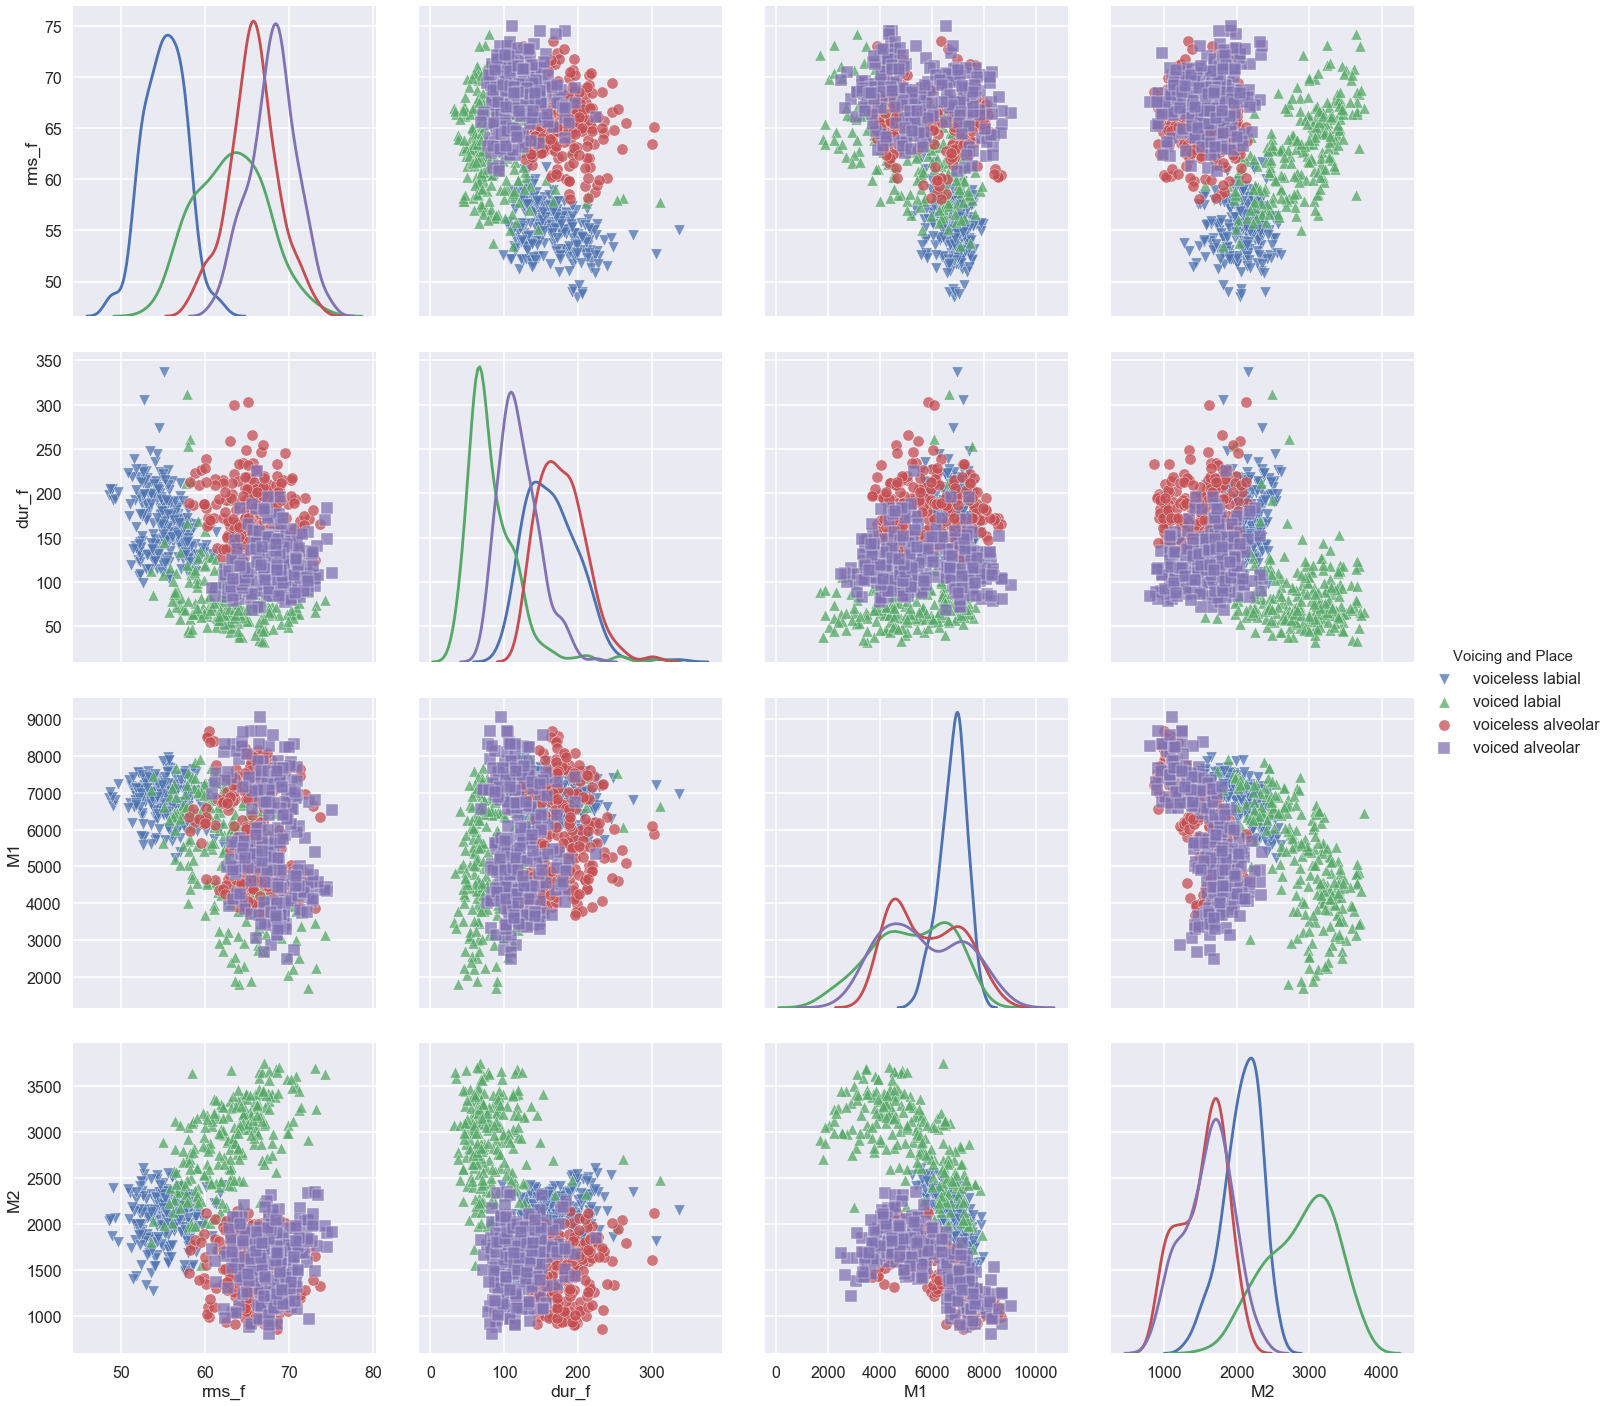

In [95]:
cols = ['rms_f','dur_f','M1','M2','Voicing and Place']
sns.pairplot(mu_df[cols], hue='Voicing and Place', markers=['v','^','o','s'],
             hue_order=['voiceless labial','voiced labial','voiceless alveolar','voiced alveolar'],
             size=5, diag_kind='kde',plot_kws={'alpha':.75});

The package altair has a number of nice features, too, though I haven't used it as much, so I'm less familiar with it. It is designed to operate at a higher level of abstraction, and it's not built on top of matplotlib, so, unlike seaborn, you can't use matplotlib in conjunction with altair to customize plots.

Here are some altair examples taken from the documentation:

In [99]:
from altair import Chart, X, Y, Axis

np.random.seed(seed=5)

cats = 'ABCDE'
means = np.arange(0,10,step=2)*2 - 6
n_obs = 250
indices = np.random.randint(low=0,high=5,size=n_obs)


data = pd.DataFrame({'Category':[cats[i] for i in indices],
                     'Value':[np.random.normal(loc=means[i],scale=10) for i in indices]})

print(data.head())

  Category      Value
0        D  -0.372262
1        A -30.852764
2        B  -5.137552
3        A   3.483822
4        E  -1.451806


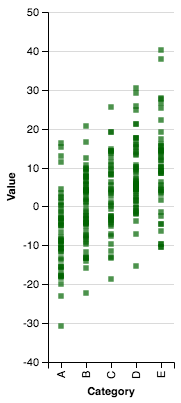

In [100]:
chart = Chart(data)
#chart.mark_bar().encode(y='a',x='mean(b)')
chart.mark_square(color='darkgreen').encode(
    X('Category',type='nominal',axis=Axis(title='Category')),
    Y('Value',type='quantitative')#,aggregate='mean',axis=Axis(title='Mean Value'))
)

In [109]:
from altair import Bin, Color, Scale, expr, load_dataset

df_w = load_dataset('seattle-weather')
df_w.head()

date  precipitation  temp_max  temp_min  wind  weather
0  2012/01/01            0.0      12.8       5.0   4.7  drizzle
1  2012/01/02           10.9      10.6       2.8   4.5     rain
2  2012/01/03            0.8      11.7       7.2   2.3     rain
3  2012/01/04           20.3      12.2       5.6   4.7     rain
4  2012/01/05            1.3       8.9       2.8   6.1     rain

In [119]:
df_w.tail()

date  precipitation  temp_max  temp_min  wind weather  temp_range
1456  2015/12/27            8.6       4.4       1.7   2.9     fog         2.7
1457  2015/12/28            1.5       5.0       1.7   1.3     fog         3.3
1458  2015/12/29            0.0       7.2       0.6   2.6     fog         6.6
1459  2015/12/30            0.0       5.6      -1.0   3.4     sun         6.6
1460  2015/12/31            0.0       5.6      -2.1   3.5     sun         7.7

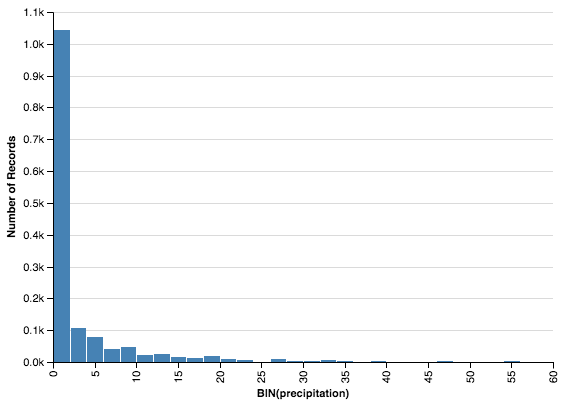

In [111]:
ch_w = Chart(df_w)

ch_w.mark_bar().encode(X('precipitation',bin=Bin(min=0,max=60,step=2)),Y('count(*):Q'))

In [112]:
scale = Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
              range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])


df_w['temp_range'] = df_w.temp_max-df_w.temp_min

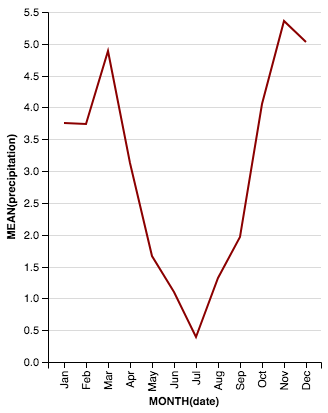

In [113]:
ch_w.mark_line(color='darkred',lineSize=3).encode(
    X('date:T', timeUnit='month'),
    Y('mean(precipitation)')
)

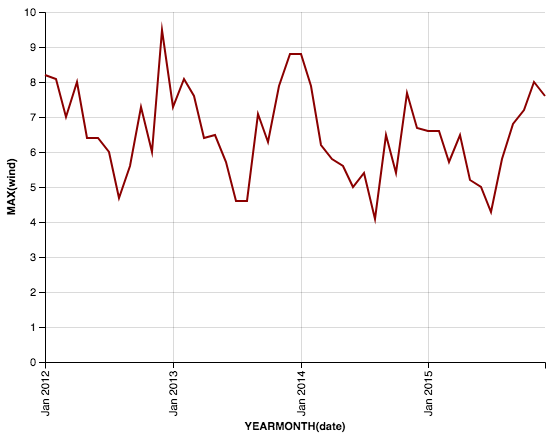

In [121]:
ch_w.mark_line().encode(X('date:T', timeUnit='yearmonth'),Y('max(wind)'))

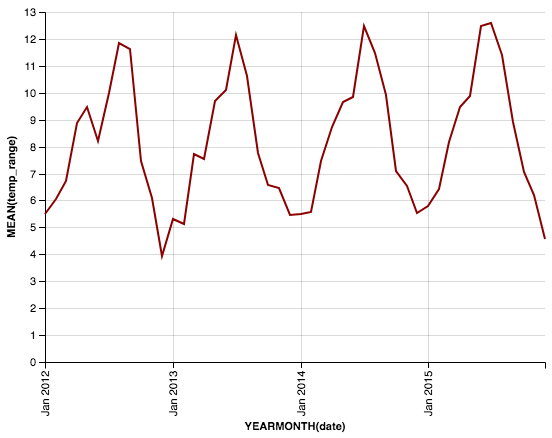

In [127]:
ch_w.mark_line().encode(X('date:T', timeUnit='yearmonth'),Y('mean(temp_range)'))

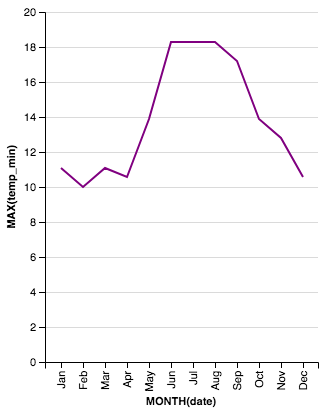

In [133]:
ch_w.mark_line(color='purple',lineSize=3).encode(
    X('date:T', timeUnit='month'),
    Y('max(temp_min)')
)

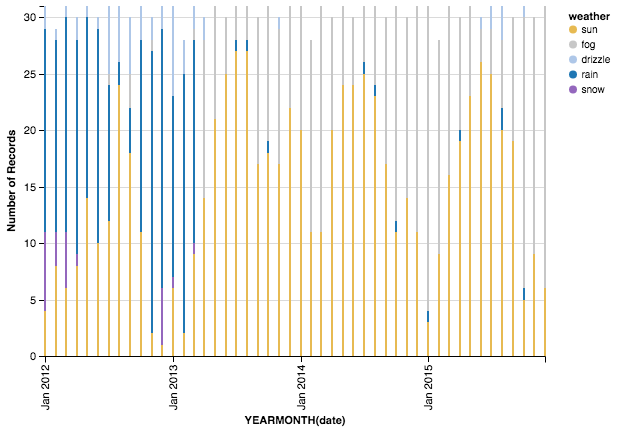

In [135]:
ch_w.mark_bar().encode(
    X('date:T', timeUnit='yearmonth'),
    Y('count(*)'),
    Color('weather', scale=scale),
)

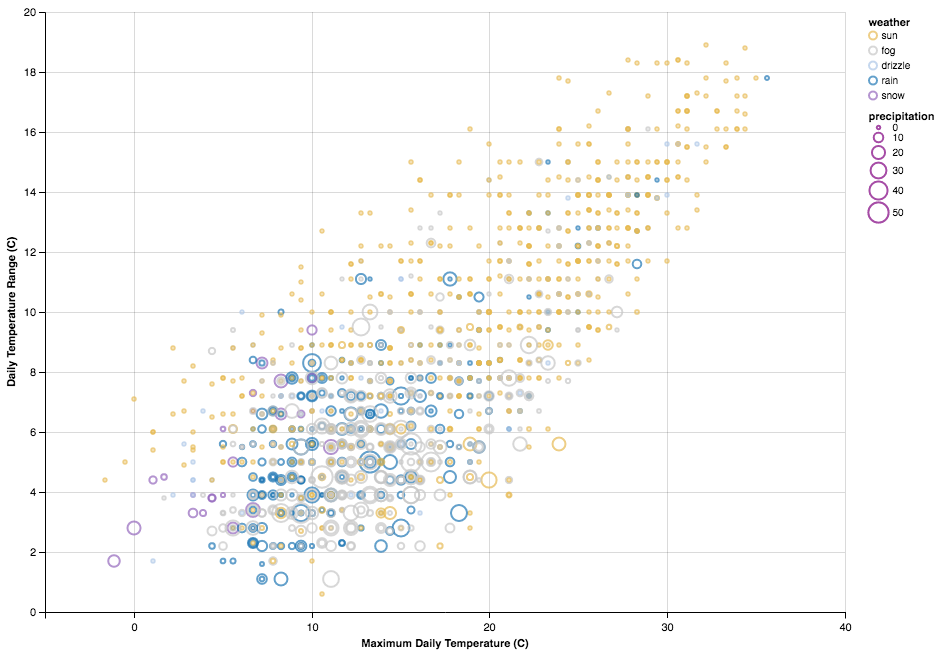

In [138]:
ch_w.mark_point().encode(
    X('temp_max', axis=Axis(title='Maximum Daily Temperature (C)')),
    Y('temp_range', axis=Axis(title='Daily Temperature Range (C)')),
    Color('weather', scale=scale),
    size='precipitation',
).configure_cell(width=800, height=600)